# This is a Kaggle competition to predict the probability of 0 or 1 of Tabular Playground series data
## I will be comparing which model to use: XGB, Random Forest or Neural Networks


Lets first load required libraries:

In [57]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D
from keras.optimizers import Adam ,RMSprop
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras import initializers
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Read a training file

In [58]:
df1 = pd.read_csv('C:/Users/taihs/OneDrive/Documents/tps competition/train.csv')

### Find the number of records

In [59]:
df1.shape

(300000, 32)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [61]:
df1.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [62]:
co = df1.corr()
co['target'].sort_values(ascending=False)

target    1.000000
cont5     0.215184
cont6     0.189832
cont8     0.183726
cont1     0.164655
cont2     0.140459
cont9     0.059242
id       -0.001407
cont0    -0.015172
cont7    -0.040646
cont10   -0.047077
cont4    -0.075585
cont3    -0.148316
Name: target, dtype: float64

In [63]:
pd.crosstab(df1['cat0'],df1['target'])

target,0,1
cat0,,
A,148852,74673
B,71687,4788


<AxesSubplot:xlabel='cat0', ylabel='target'>

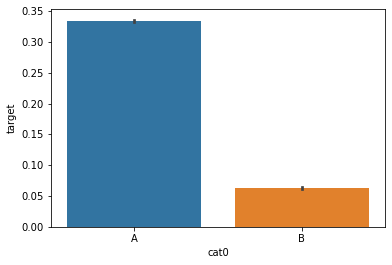

In [64]:
import seaborn as sns

sns.barplot(x=df1['cat0'],y=df1['target'])

<AxesSubplot:xlabel='cat0', ylabel='count'>

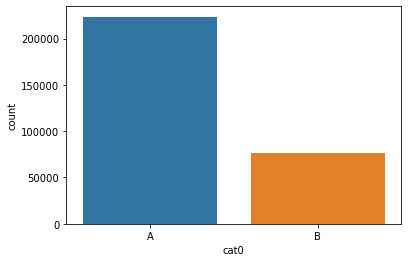

In [65]:
sns.countplot(x=df1['cat0'])

<AxesSubplot:xlabel='cat1', ylabel='target'>

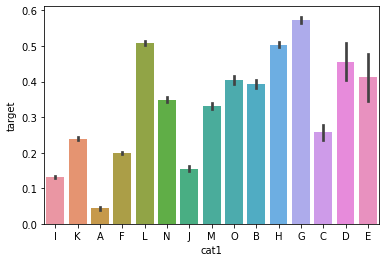

In [66]:
sns.barplot(x=df1['cat1'],y=df1['target'])

<AxesSubplot:xlabel='cat9', ylabel='Count'>

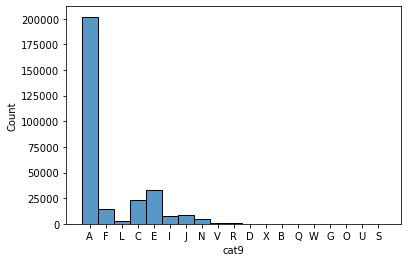

In [67]:
sns.histplot(x=df1['cat9'])

In [68]:
cat = df1.select_dtypes(include='object').columns


In [69]:
pd.crosstab(df1['target'],df1['cat0'])

cat0,A,B
target,,
0,148852,71687
1,74673,4788


In [70]:
from scipy.stats import chi2_contingency

chi2_check = []
for i in cat:
    if chi2_contingency(pd.crosstab(df1['target'], df1[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [cat, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

   Column              Hypothesis
0    cat0  Reject Null Hypothesis
1    cat1  Reject Null Hypothesis
2    cat2  Reject Null Hypothesis
3    cat3  Reject Null Hypothesis
4    cat4  Reject Null Hypothesis
5    cat5  Reject Null Hypothesis
6    cat6  Reject Null Hypothesis
7    cat7  Reject Null Hypothesis
8    cat8  Reject Null Hypothesis
9    cat9  Reject Null Hypothesis
10  cat10  Reject Null Hypothesis
11  cat11  Reject Null Hypothesis
12  cat12  Reject Null Hypothesis
13  cat13  Reject Null Hypothesis
14  cat14  Reject Null Hypothesis
15  cat15  Reject Null Hypothesis
16  cat16  Reject Null Hypothesis
17  cat17  Reject Null Hypothesis
18  cat18  Reject Null Hypothesis


In [71]:
from sklearn.preprocessing import LabelEncoder
lst = res['Column'].tolist()
le = LabelEncoder()
df3 = pd.DataFrame()
for i in lst:
    icat = le.fit_transform(df1[i])
    df2 = pd.DataFrame({i:icat})
    df3 = pd.concat([df3,df2],axis=1)
    

In [72]:
df3

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
0,0,8,0,1,1,33,0,44,54,0,258,0,0,0,0,1,3,3,1
1,0,8,0,0,4,33,8,48,3,5,162,0,1,0,1,3,1,3,1
2,0,10,0,0,4,33,0,30,38,9,69,0,1,0,0,1,3,3,1
3,0,10,0,2,4,33,0,50,3,5,241,0,0,0,0,1,3,3,1
4,0,8,6,1,4,33,2,32,54,0,75,0,0,0,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,13,5,0,4,45,0,19,48,0,159,0,0,0,1,3,1,3,1
299996,0,10,0,0,6,33,0,36,4,4,163,0,1,0,1,1,3,3,1
299997,0,6,12,0,7,33,2,37,43,0,156,1,0,0,1,3,1,3,3
299998,1,7,0,3,1,33,0,1,23,0,25,0,0,0,0,1,0,3,0


In [73]:
X = pd.concat([df3,df1[['cont0','cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10']]],axis=1)
#X = pd.concat([df3,df1[['cont1','cont2','cont5','cont6','cont8','cont9']]],axis=1)
X.shape

(300000, 30)

In [74]:
#X.drop(['cont0','cont9','cat3','cont10','cont7','cont8','cat5','cat7','cont3'],axis=1,inplace=True)
#X

In [75]:
X=X.astype('int')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   cat0    300000 non-null  int32
 1   cat1    300000 non-null  int32
 2   cat2    300000 non-null  int32
 3   cat3    300000 non-null  int32
 4   cat4    300000 non-null  int32
 5   cat5    300000 non-null  int32
 6   cat6    300000 non-null  int32
 7   cat7    300000 non-null  int32
 8   cat8    300000 non-null  int32
 9   cat9    300000 non-null  int32
 10  cat10   300000 non-null  int32
 11  cat11   300000 non-null  int32
 12  cat12   300000 non-null  int32
 13  cat13   300000 non-null  int32
 14  cat14   300000 non-null  int32
 15  cat15   300000 non-null  int32
 16  cat16   300000 non-null  int32
 17  cat17   300000 non-null  int32
 18  cat18   300000 non-null  int32
 19  cont0   300000 non-null  int32
 20  cont1   300000 non-null  int32
 21  cont2   300000 non-null  int32
 22  cont3   300000 non-n

### Find the features and split the data into train and test

In [76]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

In [77]:
from sklearn.model_selection import train_test_split

y = df1['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [78]:
Sc = preprocessing.StandardScaler()
X_train= Sc.fit(X_train).transform(X_train)
X_test= Sc.transform(X_test)


### XGBoost

In [79]:
xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)

C:\Users\taihs\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xgb.feature_importances_

array([0.06706327, 0.01498194, 0.01170831, 0.00534046, 0.02624277,
       0.01102255, 0.00766307, 0.00865909, 0.00895882, 0.00728115,
       0.00829969, 0.03372672, 0.01341711, 0.05380396, 0.0325352 ,
       0.06184799, 0.5215331 , 0.01997108, 0.06541748, 0.        ,
       0.00357563, 0.00081129, 0.        , 0.        , 0.        ,
       0.        , 0.00248556, 0.0136539 , 0.        , 0.        ],
      dtype=float32)

In [81]:
y_pred_class_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_xgb)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_xgb[:,1])))

accuracy is 0.843
roc-auc is 0.882


### RandomForest

In [82]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [83]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.830
roc-auc is 0.860


In [84]:
rf_model.feature_importances_

array([1.99770972e-02, 7.00512276e-02, 6.37486688e-02, 3.89299671e-02,
       5.57498776e-02, 2.06770367e-02, 3.91405452e-02, 1.00866290e-01,
       8.93126621e-02, 3.30580807e-02, 9.17392940e-02, 2.29304332e-02,
       8.34036641e-03, 7.72252991e-03, 3.48935006e-02, 8.22642392e-02,
       1.33183385e-01, 2.87439834e-02, 5.72317904e-02, 0.00000000e+00,
       4.80266574e-05, 3.08989410e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.51037462e-04, 1.15551804e-03,
       2.24381089e-05, 3.11061137e-05])

## Read a test file

In [85]:
df1 = pd.read_csv('C:/Users/taihs/OneDrive/Documents/tps competition/test.csv')
df1.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [87]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
lst = res['Column'].tolist()
df3 = pd.DataFrame()
for i in lst:
    icat = le.fit_transform(df1[i])
    df2 = pd.DataFrame({i:icat})
    df3 = pd.concat([df3,df2],axis=1)


In [88]:
df3

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
0,0,5,0,0,5,33,0,8,23,0,249,0,0,0,0,1,3,3,1
1,0,7,2,0,4,2,7,31,51,0,269,0,0,0,1,3,1,3,1
2,0,13,2,0,5,2,0,8,28,0,121,0,0,0,1,1,3,3,1
3,1,11,2,0,5,33,0,30,23,0,162,0,0,0,0,1,3,1,1
4,0,5,0,1,5,33,0,8,46,0,173,0,0,0,0,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,13,0,3,5,33,0,6,23,0,75,0,0,0,1,3,1,2,1
199996,1,8,0,1,4,33,0,19,55,4,180,0,0,0,1,1,3,3,1
199997,0,11,3,0,7,33,0,14,47,0,171,0,0,0,1,3,1,3,1
199998,0,10,0,2,5,33,0,43,38,0,162,0,0,0,0,1,3,3,1


In [89]:
X = pd.concat([df3,df1[['cont0','cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10']]],axis=1)
#X = pd.concat([df3,df1[['cont1','cont2','cont5','cont6','cont8','cont9']]],axis=1)
X

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0,5,0,0,5,33,0,8,23,0,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,0,7,2,0,4,2,7,31,51,0,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,0,13,2,0,5,2,0,8,28,0,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,1,11,2,0,5,33,0,30,23,0,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,0,5,0,1,5,33,0,8,46,0,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,13,0,3,5,33,0,6,23,0,...,0.361426,0.351946,0.327670,0.205547,0.679195,0.485967,0.319130,0.520681,0.519545,0.427119
199996,1,8,0,1,4,33,0,19,55,4,...,0.551106,0.628843,0.677765,0.624935,0.555306,0.242424,0.700829,0.531728,0.528427,0.922645
199997,0,11,3,0,7,33,0,14,47,0,...,0.812384,0.803348,0.324762,0.665624,0.488447,0.853213,0.578641,0.811941,0.537106,0.531758
199998,0,10,0,2,5,33,0,43,38,0,...,0.811282,0.820635,0.561449,0.797434,0.555089,0.746532,0.369986,0.438712,0.715524,0.381978


In [90]:
#X.drop(['cont0','cont9','cat3','cont10','cont7','cont8','cat5','cat7','cont3'],axis=1,inplace=True)
#X

In [91]:
X=X.astype('int')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   cat0    200000 non-null  int32
 1   cat1    200000 non-null  int32
 2   cat2    200000 non-null  int32
 3   cat3    200000 non-null  int32
 4   cat4    200000 non-null  int32
 5   cat5    200000 non-null  int32
 6   cat6    200000 non-null  int32
 7   cat7    200000 non-null  int32
 8   cat8    200000 non-null  int32
 9   cat9    200000 non-null  int32
 10  cat10   200000 non-null  int32
 11  cat11   200000 non-null  int32
 12  cat12   200000 non-null  int32
 13  cat13   200000 non-null  int32
 14  cat14   200000 non-null  int32
 15  cat15   200000 non-null  int32
 16  cat16   200000 non-null  int32
 17  cat17   200000 non-null  int32
 18  cat18   200000 non-null  int32
 19  cont0   200000 non-null  int32
 20  cont1   200000 non-null  int32
 21  cont2   200000 non-null  int32
 22  cont3   200000 non-n

In [92]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-5.84871536e-01, -1.01120305e+00, -6.36230407e-01,
        -5.18058919e-01,  1.29465996e-01,  2.65387358e-01,
        -5.97737446e-01, -1.11838839e+00, -5.52753344e-01,
        -5.86271243e-01,  1.47795544e+00, -3.98550559e-01,
        -4.10999678e-01, -1.59865185e-01, -9.35975115e-01,
        -5.62749702e-01,  6.59929099e-01,  4.28600036e-01,
        -3.85341368e-01, -2.23607357e-03, -6.32468182e-03,
        -7.74619908e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.88216841e-02,
        -6.52923950e-02, -7.07124460e-03, -1.11810387e-02],
       [-5.84871536e-01, -3.62062827e-01, -1.52758874e-01,
        -5.18058919e-01, -5.33136983e-01, -2.17765193e+00,
         2.71391909e+00,  5.37757899e-01,  9.20319820e-01,
        -5.86271243e-01,  1.75172996e+00, -3.98550559e-01,
        -4.10999678e-01, -1.59865185e-01,  1.06840447e+00,
         1.56988773e+00, -1.49372835e+00,  4.28600036e-01,
        -3.85341368e-01, -2.23607357e-03, -6.32468182e-

In [93]:
y_pred_class_rf = rf_model.predict(X)
y_pred_prob_rf = rf_model.predict_proba(X)

y_pred_class_xgb = xgb.predict(X)
y_pred_prob_xgb = xgb.predict_proba(X)

In [94]:
rf_model.feature_importances_
np.sort(xgb.feature_importances_)


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00081129, 0.00248556, 0.00357563,
       0.00534046, 0.00728115, 0.00766307, 0.00829969, 0.00865909,
       0.00895882, 0.01102255, 0.01170831, 0.01341711, 0.0136539 ,
       0.01498194, 0.01997108, 0.02624277, 0.0325352 , 0.03372672,
       0.05380396, 0.06184799, 0.06541748, 0.06706327, 0.5215331 ],
      dtype=float32)

In [95]:
#y_pred_prob_rf[:,1]
y_pred_prob_xgb[:,1]

array([0.1447803 , 0.30961773, 0.04213469, ..., 0.69286907, 0.03106131,
       0.6059582 ], dtype=float32)

In [96]:
#final = pd.DataFrame({'target':y_pred_prob_rf[:,1]})
final = pd.DataFrame({'target':y_pred_prob_xgb[:,1]})
final.tail()

,target
199995,0.871420
199996,0.014474
199997,0.692869
199998,0.031061
199999,0.605958


In [97]:
final1 = pd.concat([df1['id'],final],axis=1)
final1.tail()

,id,target
199995,499983,0.871420
199996,499984,0.014474
199997,499987,0.692869
199998,499994,0.031061
199999,499998,0.605958


In [98]:
final1.to_csv('sample_submission.csv',index=False)

### Train a Neural Network model with one hidden layer with sigmoid activation

In [23]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (30,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
7500/7500 [==============================] - 8s 1ms/step - loss: 0.4596 - accuracy: 0.7929 - val_loss: 0.4102 - val_accuracy: 0.8256
Epoch 2/50
7500/7500 [==============================] - 9s 1ms/step - loss: 0.4018 - accuracy: 0.8284 - val_loss: 0.3997 - val_accuracy: 0.8269
Epoch 3/50
7500/7500 [==============================] - 9s 1ms/step - loss: 0.3969 - accuracy: 0.8287 - val_loss: 0.3976 - val_accuracy: 0.8281
Epoch 4/50
7500/7500 [==============================] - 9s 1ms/step - loss: 0.3955 - accuracy: 0.8291 - val_loss: 0.3967 - val_accuracy: 0.8282
Epoch 5/50
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3947 - accuracy: 0.8291 - val_loss: 0.3961 - val_accuracy: 0.8285
Epoch 6/50
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3942 - accuracy: 0.8293 - val_loss: 0.3957 - val_accuracy: 0.8285
Epoch 7/50
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3939 - accuracy: 0.8292 - val_loss: 0.3954 - val_accuracy:

In [25]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.831
roc-auc is 0.860


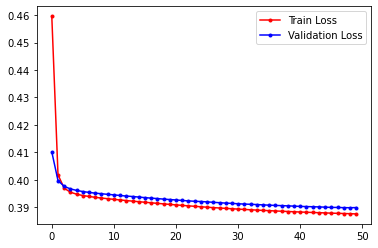

In [27]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Add two hidden layers to the Neural Networks

In [36]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (30,),activation = 'sigmoid'))
model_1.add(Dense(12,activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_12 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 13        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
7500/7500 [==============================] - 5s 662us/step - loss: 0.5806 - accuracy: 0.7330 - val_loss: 0.5639 - val_accuracy: 0.7362
Epoch 2/100
7500/7500 [==============================] - 5s 684us/step - loss: 0.5435 - accuracy: 0.7348 - val_loss: 0.5123 - val_accuracy: 0.7362
Epoch 3/100
7500/7500 [==============================] - 6s 745us/step - loss: 0.4714 - accuracy: 0.7645 - val_loss: 0.4353 - val_accuracy: 0.8162
Epoch 4/100
7500/7500 [==============================] - 5s 624us/step - loss: 0.4177 - accuracy: 0.8256 - val_loss: 0.4091 - val_accuracy: 0.8263
Epoch 5/100
7500/7500 [==============================] - 5s 628us/step - loss: 0.4043 - accuracy: 0.8284 - val_loss: 0.4036 - val_accuracy: 0.8271
Epoch 6/100
7500/7500 [==============================] - 5s 630us/step - loss: 0.4007 - accuracy: 0.8286 - val_loss: 0.4014 - val_accuracy: 0.8274
Epoch 7/100
7500/7500 [==============================] - 5s 640us/step - loss: 0.3989 - accuracy: 0.8288 - val_loss: 0

In [38]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.834
roc-auc is 0.863


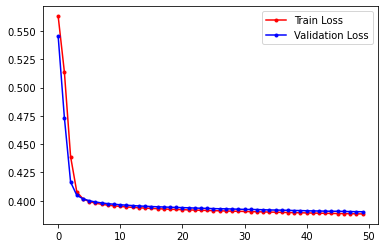

In [31]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Change to two hidden layers with activation relu

In [35]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (30,),activation = 'relu'))
model_1.add(Dense(12,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

Epoch 1/300
7500/7500 [==============================] - 5s 601us/step - loss: 0.6763 - accuracy: 0.7950 - val_loss: 0.4338 - val_accuracy: 0.8257
Epoch 2/300
7500/7500 [==============================] - 4s 588us/step - loss: 2.5695 - accuracy: 0.7714 - val_loss: 2.5942 - val_accuracy: 0.7392
Epoch 3/300
7500/7500 [==============================] - 4s 575us/step - loss: 1.2651 - accuracy: 0.7479 - val_loss: 0.9644 - val_accuracy: 0.2795
Epoch 4/300
7500/7500 [==============================] - 4s 595us/step - loss: 2.0081 - accuracy: 0.7423 - val_loss: 4.0681 - val_accuracy: 0.7362
Epoch 5/300
7500/7500 [==============================] - 5s 613us/step - loss: 2.5602 - accuracy: 0.7350 - val_loss: 0.5755 - val_accuracy: 0.7368
Epoch 6/300
7500/7500 [==============================] - 4s 556us/step - loss: 0.5701 - accuracy: 0.7401 - val_loss: 0.5651 - val_accuracy: 0.7449
Epoch 7/300
7500/7500 [==============================] - 4s 579us/step - loss: 0.5635 - accuracy: 0.7451 - val_loss: 0

7500/7500 [==============================] - 4s 596us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 112/300
7500/7500 [==============================] - 4s 578us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 113/300
7500/7500 [==============================] - 4s 543us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 114/300
7500/7500 [==============================] - 4s 563us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 115/300
7500/7500 [==============================] - 4s 540us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 116/300
7500/7500 [==============================] - 4s 541us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 117/300
7500/7500 [==============================] - 4s 541us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4

7500/7500 [==============================] - 4s 585us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 167/300
7500/7500 [==============================] - 4s 561us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 168/300
7500/7500 [==============================] - 4s 565us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 169/300
7500/7500 [==============================] - 4s 562us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 170/300
7500/7500 [==============================] - 4s 564us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 171/300
7500/7500 [==============================] - 4s 559us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 172/300
7500/7500 [==============================] - 4s 562us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4

7500/7500 [==============================] - 5s 699us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 222/300
7500/7500 [==============================] - 5s 653us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 223/300
7500/7500 [==============================] - 5s 699us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 224/300
7500/7500 [==============================] - 4s 552us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 225/300
7500/7500 [==============================] - 4s 528us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 226/300
7500/7500 [==============================] - 4s 531us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4.0683 - val_accuracy: 0.7362
Epoch 227/300
7500/7500 [==============================] - 4s 530us/step - loss: 4.0899 - accuracy: 0.7348 - val_loss: 4

In [34]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.736
roc-auc is 0.500


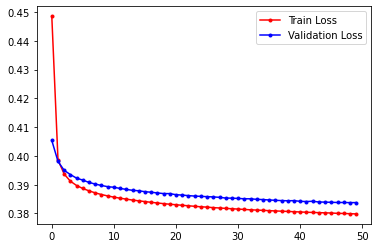

In [238]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [47]:
y_pred_class_nn_1 = model_1.predict_classes(X)
y_pred_prob_nn_1 = model_1.predict(X)


In [51]:
final=pd.DataFrame({'target': y_pred_prob_nn_1[:,0]})
final.head()

,target
0,0.094652
1,0.503521
2,0.165381
3,0.087442
4,0.148275


In [52]:
final1 = pd.concat([df1['id'],final],axis=1)
final1.head()

,id,target
0,5,0.094652
1,6,0.503521
2,8,0.165381
3,9,0.087442
4,11,0.148275


In [53]:
final1.to_csv('sample_submission.csv',index=False)